In [18]:
# proxies for internet access on the cluster
%env http_proxy=http://proxy-default:3128
%env https_proxy=http://proxy-default:3128
%env ftp_proxy=http://proxy-default:3128

import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # sets seaborn default "prettyness:
sns.set_style("ticks")
# scale plots
sns.set_context("paper")
import matplotlib as mpl
scale = 0.8
d = dict([(k, v*scale) for (k, v) in sns.plotting_context('paper').items()])
d['figure.figsize'] = [5.4, 3.5]
mpl.rcParams.update(d)

env: http_proxy=http://proxy-default:3128
env: https_proxy=http://proxy-default:3128
env: ftp_proxy=http://proxy-default:3128


In [19]:
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import random

from sklearn.cluster import KMeans

import geneinfo as gi
gi.email('kaspermunch@birc.au.dk')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# scale down size of default plots
sns.set_context("paper")
import matplotlib as mpl
scale = 0.8
d = dict([(k, v*scale) for (k, v) in sns.plotting_context('paper').items()])
d['figure.figsize'] = [5.4, 3.5]
mpl.rcParams.update(d)

# high-res plots
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

from matplotlib_venn import venn2, venn3


class left:
    def __rlshift__(self, df):
        "Left align columns of data frame: df << left()"
        left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
        left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector = 'th', props=[('text-align', 'left')])])
        display(left_aligned_df)

from math import sqrt
from itertools import zip_longest

def list_genes(words, ncols=None):
    n = len(words)
    col_width = max(map(len, words)) + 3
    if ncols is None:
        ncols = min(200//col_width, 1+sqrt(n/col_width))
    nrows = int(n/ncols) + 1
    rows = []
    for r in range(0, n, nrows):
        rows.append(words[r:r+nrows])
    for row in list(zip_longest(*rows, fillvalue='')):
        line = []
        for gene in row:
            line.append(gene.ljust(col_width))
        print(''.join(line))

        
from matplotlib.patches import Rectangle, Polygon
from collections import defaultdict

# proxies for internet access on the cluster
%env http_proxy=http://proxy-default:3128
%env https_proxy=http://proxy-default:3128
%env ftp_proxy=http://proxy-default:3128


import requests
from tqdm.notebook import tqdm

ModuleNotFoundError: No module named 'matplotlib_venn'

In [15]:
SHEET_ID = '1JSjSLuto3jqdEnnG7JqzeC_1pUZw76n7XueVAYrUOpk'
SHEET_NAME = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
df = pd.read_csv(url, header=1)
df.head()

,all_npx,neuron_genome_proteome,neuron_npx_proteome,matos_neuron,matos_common,Unnamed: 5,Unnamed: 6,all_post_mei_expr,msci,msci_esc,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,ABCB7,A1BG,ABCB7,ABCB7,ABCB7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABCD1,A1CF,ABCD1,ABCD1,ABCD1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACE2,A2M,ACOT9,ACOT9,ACOT9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACE2-DT,AAAS,ACSL4,ACSL4,ADGRG2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACOT9,AACS,ADGRG2,ADGRG2,ADGRG4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def read_google_sheet():
    SHEET_ID = '1JSjSLuto3jqdEnnG7JqzeC_1pUZw76n7XueVAYrUOpk'
    SHEET_NAME = 'Sheet1'
    url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
    df = pd.read_csv(url, header=1)
    return df.loc[:, [not x.startswith('Unnamed') for x in df.columns]]
    
def gene_list_names():
    df = read_google_sheet()
    return sorted(df.columns.tolist())

def gene_list(name):
    df = read_google_sheet()
    sr = df[name]
    return sr[~sr.isnull()].tolist()
    
gene_list_names()

['accel_reg_simiiformes_br',
 'all_npx',
 'all_post_mei_expr',
 'cDEG',
 'candidates',
 'ech75_regions',
 'expr_mod_xi_copynr_fibrobl',
 'expr_mod_xi_copynr_lcl',
 'gametologs',
 'intelect_disabil',
 'matos_common',
 'matos_common_no_xy_gametologs',
 'matos_neuron',
 'msci',
 'msci_esc',
 'my_primate_codeml',
 'nDEG',
 'neuron_genome_proteome',
 'neuron_npx_proteome',
 'primate_ampl_multi',
 'reg_sa_pheno',
 'sfari_all_conf',
 'xi',
 'xi_any_evidence',
 'xi_escape',
 'xi_uncertain']

In [ ]:
gametologs = gene_list('gametologs')
list_genes(gametologs)

In [ ]:
genes_nucleus_de_x = gene_list('nDEG')
list_genes(genes_nucleus_de_x)

In [ ]:
from openpyxl import load_workbook
wb = load_workbook(filename = '../data/matos_et_al_2021/rsob200322_si_002 2.xlsx')
wb.sheetnames

In [ ]:
def read_matos_som_sheet(sheet_name):
    data = wb.worksheets[wb.sheetnames.index(sheet_name)].values
    columns = next(data)
    columns = next(data) # second row has col names
    df = pd.DataFrame(data, columns=columns)
    df = df.loc[~pd.isnull(df['Uniprot ID'])] # remove empty excel rows
    df = df.rename(columns={'Uniprot ID': 'uniprot', 'Gene name': 'name', 'Protein names': 'long_name'})
    return df

In [ ]:
sperm_proteome = read_matos_som_sheet('Sperm proteome')
sperm_proteome.tail()

In [ ]:
neuron_proteome = read_matos_som_sheet('Neuron proteome')
neuron_proteome.tail()

In [ ]:
common_proteome = read_matos_som_sheet('Common proteins')
common_proteome.tail()

In [11]:
df = pd.read_csv('ASD_M_ChrX_iPSYCH2015.genes.bonf.out', sep='\t')
df

,GENE,NAME,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P,BONF,Sig
0,7499,XG,X,2670069,2734541,101,18,33210,0.801610,0.211390,1.0,0
1,8908,GYG2,X,2746863,2800861,164,20,33254,0.565110,0.286000,1.0,0
2,414,ARSD,X,2822011,2847416,64,11,33143,0.452440,0.325470,1.0,0
3,415,ARSE,X,2852673,2886345,28,8,33324,1.206700,0.113780,1.0,0
4,347527,ARSH,X,2924654,2951426,63,12,33324,2.802800,0.002533,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
706,79184,BRCC3,X,154299695,154351349,47,9,33324,-0.092097,0.536690,1.0,0
707,7411,VBP1,X,154425290,154468098,38,7,33324,0.976730,0.164350,1.0,0
708,116442,RAB39B,X,154487526,154493852,4,2,33324,1.024400,0.152820,1.0,0
709,1193,CLIC2,X,154505500,154563997,57,4,33324,1.085200,0.138920,1.0,0


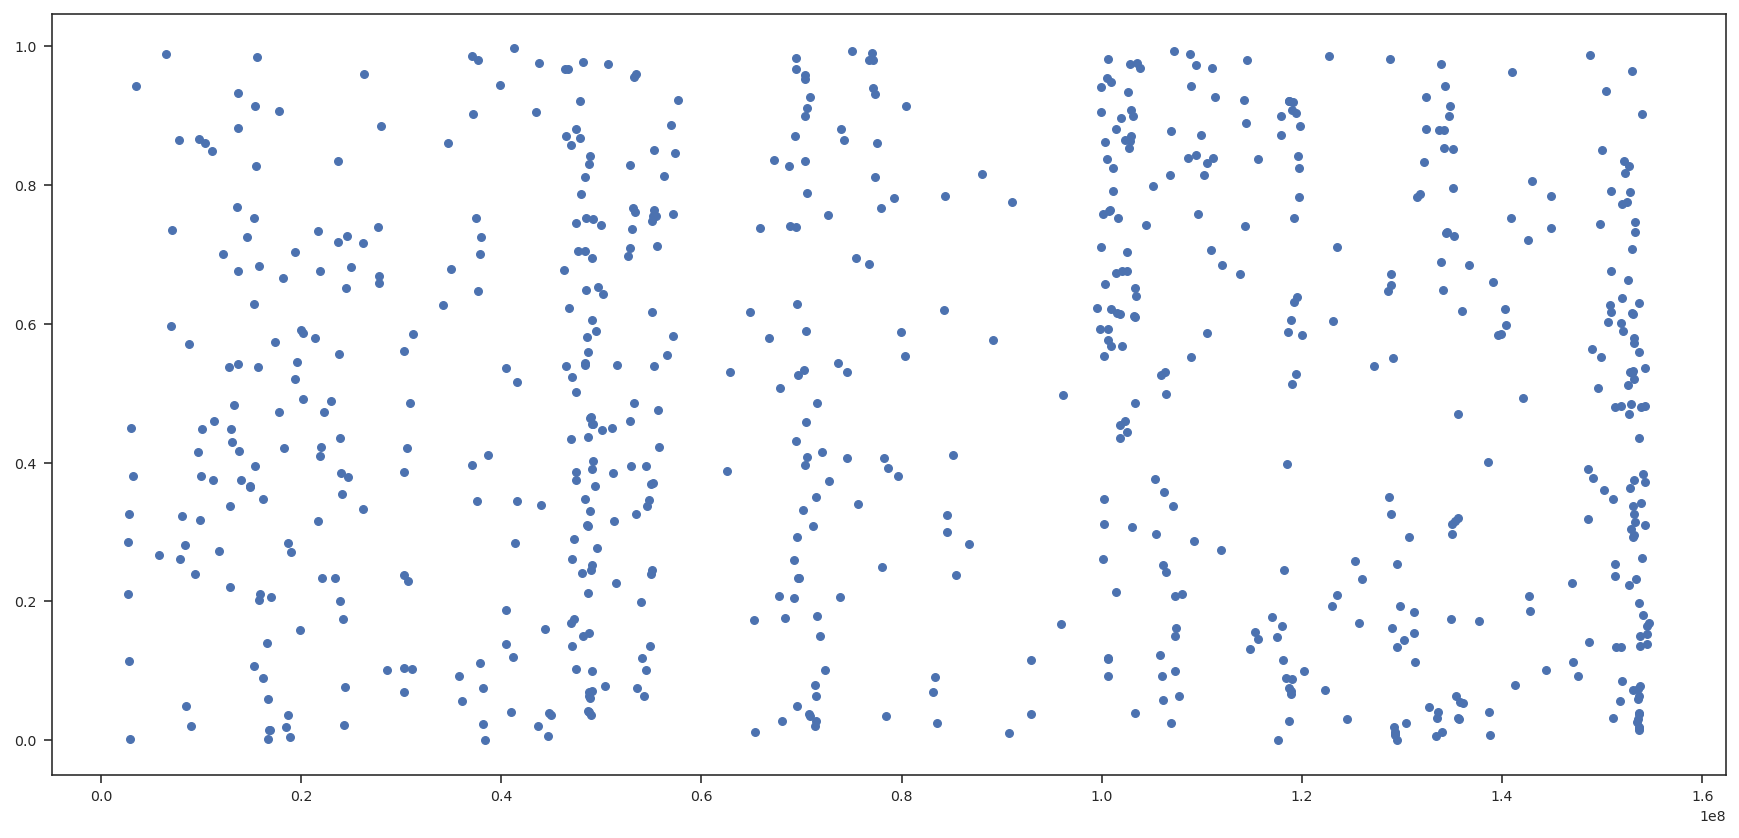

In [14]:
plt.figure(figsize=(15, 7))
plt.scatter(df.START, df.P)